In [ ]:
##Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# style definition
sns.set_style('white')


In [ ]:
## Opening Data
df=pd.read_csv('sales_data_sample.csv', encoding = 'ISO-8859-1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


* The above table gives the top five data for all the columns present in the data.

In [ ]:
##Getting to know the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


* The above function was used to know the how many non-null values are present in the data and what kind of dtype are present in each column. For example: Int64 as integer, float64 as decimal numbers and object is treated like text.
We can also know that there are algother 25 columns and non null counts of each columns.

In [ ]:
df_missing = df.isnull().sum()
df_missing

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


The above function was called to know how many missing values are present in each column. Missing values meaning null values. So, basically this function goes over each row of a certain column and if there is peresent number then it prints False and if there is empty or NaN then it counts true and add up the true values for that specifc column which is shown above. For example: If we see the TERRITORY column it has 1074 as it's values so it means there are 1074 Nan values.

From above we can clealry see that address line 2 is empty in most cases and 1486 rows are missing State name and 1074 are missing territory name.

So, we will be focusing most on the columsn which has no NaN.

In [ ]:
# Unique values in categorical columns
categorical_cols = ['STATUS', 'PRODUCTLINE', 'COUNTRY', 'DEALSIZE']
df_unique_values = {col: df[col].unique() for col in categorical_cols}
df_unique_values

{'STATUS': array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
        'Resolved'], dtype=object),
 'PRODUCTLINE': array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
        'Planes', 'Ships', 'Trains'], dtype=object),
 'COUNTRY': array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
        'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
        'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
        'Ireland'], dtype=object),
 'DEALSIZE': array(['Small', 'Medium', 'Large'], dtype=object)}

The above function was called to quickly know what kind of data are present under the particular columns. For example: Seeing Status section we get to know that, the values of that columns are either shipped, disputed, In Process, Cancelled and On hold.

In [ ]:
# 2 Filtering Data

# Filter top 10 highest sales orders
df_top_10 = df.nlargest(10, 'SALES')
df_top_10

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
598,10407,76,100.0,2,14082.8,4/22/2005 0:00,On Hold,2,4,2005,...,3086 Ingle Ln.,NaN,San Jose,CA,94217,USA,NaN,Frick,Sue,Large
744,10322,50,100.0,6,12536.5,11/4/2004 0:00,Shipped,4,11,2004,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Large
53,10424,50,100.0,6,12001.0,5/31/2005 0:00,In Process,2,5,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Large
1062,10412,60,100.0,9,11887.8,5/3/2005 0:00,Shipped,2,5,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Large
104,10403,66,100.0,9,11886.6,4/8/2005 0:00,Shipped,2,4,2005,...,Berkeley Gardens 12 Brewery,NaN,Liverpool,NaN,WX1 6LT,UK,EMEA,Devon,Elizabeth,Large
1995,10405,76,100.0,3,11739.7,4/14/2005 0:00,Shipped,2,4,2005,...,"24, place Kluber",NaN,Strasbourg,NaN,67000,France,EMEA,Citeaux,Frederique,Large
44,10312,48,100.0,3,11623.7,10/21/2004 0:00,Shipped,4,10,2004,...,5677 Strong St.,NaN,San Rafael,CA,97562,USA,NaN,Nelson,Valarie,Large
1133,10333,46,100.0,2,11336.7,11/18/2004 0:00,Shipped,4,11,2004,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Large
188,10127,46,100.0,2,11279.2,6/3/2003 0:00,Shipped,2,6,2003,...,4092 Furth Circle,Suite 400,NYC,NY,10022,USA,NaN,Young,Jeff,Large
30,10150,45,100.0,8,10993.5,9/19/2003 0:00,Shipped,3,9,2003,...,"Bronz Sok., Bronz Apt. 3/6 Tesvikiye",NaN,Singapore,NaN,79903,Singapore,Japan,Natividad,Eric,Large


In [ ]:
#Filter top 10 lowest sales
df_lowest_10 = df.nsmallest(10, 'SALES')
df_lowest_10

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2249,10425,11,43.83,6,482.13,5/31/2005 0:00,In Process,2,5,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Small
1287,10407,6,90.19,3,541.14,4/22/2005 0:00,On Hold,2,4,2005,...,3086 Ingle Ln.,NaN,San Jose,CA,94217,USA,NaN,Frick,Sue,Small
2044,10408,15,36.93,1,553.95,4/22/2005 0:00,Shipped,2,4,2005,...,2-2-8 Roppongi,NaN,Minato-ku,Tokyo,106-0032,Japan,Japan,Shimamura,Akiko,Small
1551,10280,20,28.88,12,577.60,8/17/2004 0:00,Shipped,3,8,2004,...,Via Monte Bianco 34,NaN,Torino,NaN,10100,Italy,EMEA,Accorti,Paolo,Small
1818,10419,15,42.67,7,640.05,5/17/2005 0:00,Shipped,2,5,2005,...,Geislweg 14,NaN,Salzburg,NaN,5020,Austria,EMEA,Pipps,Georg,Small
2209,10264,20,32.59,4,651.80,6/30/2004 0:00,Shipped,2,6,2004,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Small
2045,10420,15,43.49,3,652.35,5/29/2005 0:00,In Process,2,5,2005,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Small
1548,10214,20,34.19,3,683.80,1/26/2004 0:00,Shipped,1,1,2004,...,"C/ Araquil, 67",NaN,Madrid,NaN,28023,Spain,EMEA,Sommer,Mart¡n,Small
1553,10304,23,30.20,16,694.60,10/11/2004 0:00,Shipped,4,10,2004,...,"67, avenue de l'Europe",NaN,Versailles,NaN,78000,France,EMEA,Tonini,Daniel,Small
1557,10344,20,35.18,6,703.60,11/25/2004 0:00,Shipped,4,11,2004,...,"12, rue des Bouchers",NaN,Marseille,NaN,13008,France,EMEA,Lebihan,Laurence,Small


The above function df.nlargest was called to know the top 10 highest sales order. Seeing this we know that the largest sales amount was 14082.8 and order no for that was 10407 and quantity ordered was 76


In [ ]:
# Filter sales from a specific year (e.g., 2004) with the highest sell of that year.
df_2004 = df[df['YEAR_ID'] == 2004]
df_2004.sort_values(by='SALES', ascending=False)



,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
744,10322,50,100.00,6,12536.5,11/4/2004 0:00,Shipped,4,11,2004,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Large
44,10312,48,100.00,3,11623.7,10/21/2004 0:00,Shipped,4,10,2004,...,5677 Strong St.,NaN,San Rafael,CA,97562,USA,NaN,Nelson,Valarie,Large
1133,10333,46,100.00,2,11336.7,11/18/2004 0:00,Shipped,4,11,2004,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Large
1839,10339,55,100.00,13,10758.0,11/23/2004 0:00,Shipped,4,11,2004,...,2-2-8 Roppongi,NaN,Minato-ku,Tokyo,106-0032,Japan,Japan,Shimamura,Akiko,Large
198,10247,44,100.00,2,10606.2,5/5/2004 0:00,Shipped,2,5,2004,...,"Software Engineering Center, SEC Oy",NaN,Espoo,NaN,FIN-02271,Finland,EMEA,Suominen,Kalle,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,10344,20,35.18,6,703.6,11/25/2004 0:00,Shipped,4,11,2004,...,"12, rue des Bouchers",NaN,Marseille,NaN,13008,France,EMEA,Lebihan,Laurence,Small
1553,10304,23,30.20,16,694.6,10/11/2004 0:00,Shipped,4,10,2004,...,"67, avenue de l'Europe",NaN,Versailles,NaN,78000,France,EMEA,Tonini,Daniel,Small
1548,10214,20,34.19,3,683.8,1/26/2004 0:00,Shipped,1,1,2004,...,"C/ Araquil, 67",NaN,Madrid,NaN,28023,Spain,EMEA,Sommer,Mart¡n,Small
2209,10264,20,32.59,4,651.8,6/30/2004 0:00,Shipped,2,6,2004,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Small


* The above function was called to know the sales in the specific year and was sorted to know the highest sales of that year. For example: Here we are looking at year 2004 and the highest sale was 12536.5 and the order no for that sales was 10322.


In [ ]:
## Filter All Sales From Country US and arrange them in descending order

df_us = df[df['COUNTRY'] == 'USA']
df_us.sort_values(by='SALES', ascending=False)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
598,10407,76,100.00,2,14082.80,4/22/2005 0:00,On Hold,2,4,2005,...,3086 Ingle Ln.,NaN,San Jose,CA,94217,USA,NaN,Frick,Sue,Large
744,10322,50,100.00,6,12536.50,11/4/2004 0:00,Shipped,4,11,2004,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Large
44,10312,48,100.00,3,11623.70,10/21/2004 0:00,Shipped,4,10,2004,...,5677 Strong St.,NaN,San Rafael,CA,97562,USA,NaN,Nelson,Valarie,Large
1133,10333,46,100.00,2,11336.70,11/18/2004 0:00,Shipped,4,11,2004,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Large
188,10127,46,100.00,2,11279.20,6/3/2003 0:00,Shipped,2,6,2003,...,4092 Furth Circle,Suite 400,NYC,NY,10022,USA,NaN,Young,Jeff,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,10367,23,36.29,13,834.67,1/12/2005 0:00,Resolved,1,1,2005,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Small
1731,10281,20,40.66,2,813.20,8/19/2004 0:00,Shipped,3,8,2004,...,7586 Pompton St.,NaN,Allentown,PA,70267,USA,NaN,Yu,Kyung,Small
1794,10135,20,35.87,1,717.40,7/2/2003 0:00,Shipped,3,7,2003,...,5677 Strong St.,NaN,San Rafael,CA,97562,USA,NaN,Nelson,Valarie,Small
2209,10264,20,32.59,4,651.80,6/30/2004 0:00,Shipped,2,6,2004,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Small


* The above fucntion was called to know the Sales from a specific country. In this case the country is Us and the sales value are sorted to know the highest sales.

So, we can clearly see from it that the highest sales in Us was 14082.80

In [ ]:
##Frequency table for Productline

df1=pd.crosstab(df['PRODUCTLINE'], 'frequency')
#Drop col_0
df1.columns.name=''

##Create percentages column
n_PRODUCTLINE= df1['frequency'].sum()
df1['Percentages']= df1['frequency']/n_PRODUCTLINE*100
Total= 'Total'
df1.loc['Total']=df1.sum()


## Adding no decimals to frequency and 1 digit decimal for percentages
df1.style.format({'frequency': '{:.0f}', 'Percentages': '{:.1f}%'})






,frequency,Percentages
PRODUCTLINE,,
Classic Cars,967,34.3%
Motorcycles,331,11.7%
Planes,306,10.8%
Ships,234,8.3%
Trains,77,2.7%
Trucks and Buses,301,10.7%
Vintage Cars,607,21.5%
Total,2823,100.0%


* The frequency table is created for Productline using the pd crosstab and the total is added using loc fucntion.

* From the above frequency we can know that the Classic Cars were the product that was mostly sold. Similarly, on second Vintage cars comes and on thrid we see Motorcycles.

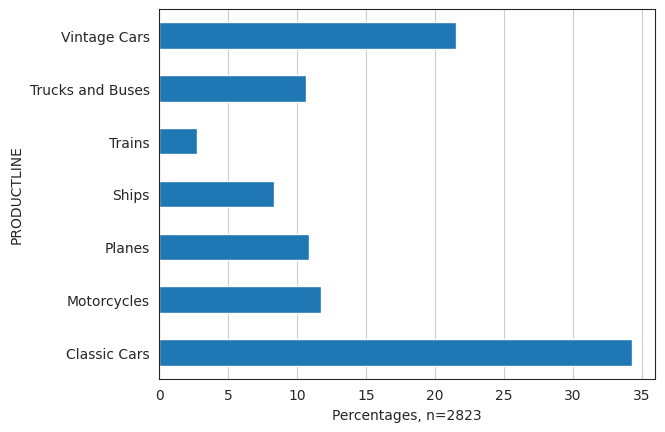

In [ ]:
# creating a bar chart to illustrate the percentage column in frequency table above
df1 = df1.drop('Total')
# create a simple bar chart
df1['Percentages'].plot(kind='barh')

# x-axis title
plt.xlabel(f'Percentages, n={n_PRODUCTLINE}')

# add grid
plt.grid(axis='x')

* The above bar chart is the plot of percentages of frequencies of column Produline.

* From the above barchart, it is clear that classic cars is the most sold product. Similarly, Vintage cars hold the second position whereas trains are the least sold product. Also, we can see a very close competition between the turcks & buses and planes sales.


In [ ]:
##Frequency table for variable country
df2=pd.crosstab(df['COUNTRY'], 'frequency')

#Dropping the Columns
df2.columns.name=''

#Finding N values
n_country= df2['frequency'].sum()

#Creating new Percentages columns:
df2['Percentages']=df2['frequency']/n_country*100
Total= 'Total'
df2.loc[Total]=df2.sum()
df2.style.format({'frequency': '{:.0f}', 'Percentages': '{:.1f}'})


,frequency,Percentages
COUNTRY,,
Australia,185,6.6
Austria,55,1.9
Belgium,33,1.2
Canada,70,2.5
Denmark,63,2.2
Finland,92,3.3
France,314,11.1
Germany,62,2.2
Ireland,16,0.6


* The frequency table is created for Country using the pd crosstab and the total is added using loc fucntion.

* From the above frequency we can see that the US is the country that has done the most sales, followed by Spain on second place and France on third whereas Ireland stands on the least position in this comparison

* The sales made by Us is almost 3 times the sales made by spain and France.

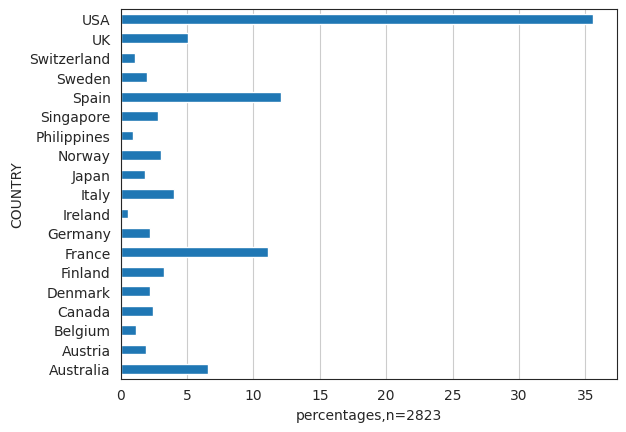

In [ ]:
# Creating bar chart to illustrate the above percentage column.
df2=df2.drop('Total')
df2['Percentages'].plot(kind='barh')
plt.xlabel(f'percentages,n={n_country}')
plt.grid(axis='x')

* The above bar chart is the plot of percentages of frequencies of column COUNTRY.

* From the above barchart, it is clear that US has done the most sales which followed by Spain and France on second and third postion respectively. Similarly, Ireland is the country with the least sales in the above data.


In [ ]:
#Frequency for variable Status
df3=pd.crosstab(df['STATUS'], 'frequency')

# Renaming  Column
df3.columns.name=''
# Calculating the n_values
n_status= df3['frequency'].sum()
# Calculating the percentages
df3['Percentages']=df3['frequency']/n_status*100

Total='Total'
df3.loc['Total']=df3.sum()

#Formatting the decimals
df3.style.format({'frequency': '{:.0f}', 'Percentages': '{:.1f}'})

,frequency,Percentages
STATUS,,
Cancelled,60,2.1
Disputed,14,0.5
In Process,41,1.5
On Hold,44,1.6
Resolved,47,1.7
Shipped,2617,92.7
Total,2823,100.0


* The frequency table is created for column STATUS using the pd crosstab and the total is added using loc fucntion.

* From the above frequency we can see that the 92.7% of the products bought were shipped correctly. Whereas, 2.1% of them were cancelled and rest few of thems were on hold, disputed and so on which can be seen from the above frequency table


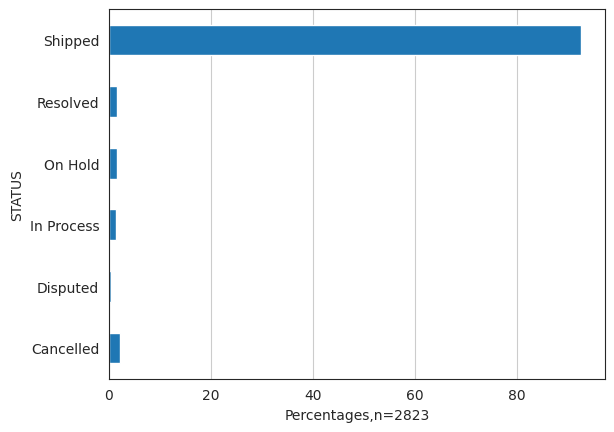

In [ ]:
#Create bar chart for column Status using above percentages
df3=df3.drop('Total')
df3['Percentages'].plot(kind='barh')
plt.xlabel(f'Percentages,n={n_status}')
plt.grid(axis='x')

* The above bar chart is the plot of percentages of frequencies of column STATUS.

* From the above bar chart, it is clear that majority of the prodcuts were shipped and very very few of them went on disputed and few other percentages of them were on various issues such as on hold, in process and so on.

In [ ]:
# Frequency tabke for variable deal size
df4=pd.crosstab(df['DEALSIZE'], 'frequency')

# Renaming  Column
df4.columns.name=''
# Calculating the n_values
n_dealsize= df3['frequency'].sum()
# Calculating the percentages
df4['Percentages']=df4['frequency']/n_dealsize*100

Total='Total'
df4.loc['Total']=df4.sum()

#Formatting the decimals
df4.style.format({'frequency': '{:.0f}', 'Percentages': '{:.1f}'})

,frequency,Percentages
DEALSIZE,,
Large,157,5.6
Medium,1384,49.0
Small,1282,45.4
Total,2823,100.0


* The frequency table is created for column DEALSIZE using the pd crosstab and the total is added using loc fucntion.

* From the above frequency we can see that the almost majority of the products ordered were medium and small size and very samll percentages of order were Large.


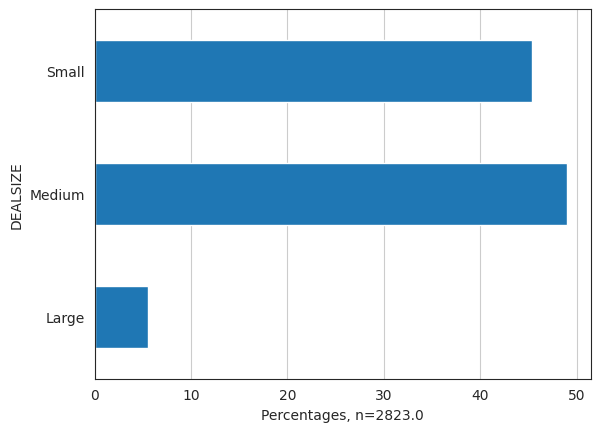

In [ ]:
#Creating barchart for variable deal size using the percentages column
df4= df4.drop('Total')
df4['Percentages'].plot(kind='barh')
plt.xlabel(f'Percentages, n={n_dealsize}')
plt.grid(axis='x')

* The above bar chart is the plot of percentages of frequencies of column DEALSIZE

* From the above bar chart, it is clear that majority of the order were medium and small size whereas very few of them were Large.

In [ ]:
# create new classified variable

limits = [0, 500, 1000, 2000 , 3000 , 4000 , 5000 , 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000]

# add new variable salary_class
df['sales_class'] = pd.cut(df['SALES'] , bins=limits, right=False)

df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,sales_class
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,"[2000, 3000)"
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,"[2000, 3000)"
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,"[3000, 4000)"
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,"[3000, 4000)"
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,"[5000, 6000)"


* This code creates a new categorical variable called sales_class in a Pandas DataFrame (df) based on the existing SALES column.  

* It uses pd.cut to divide the SALES values into bins defined by the limits list. right=False means the intervals are closed on the left and open on the right (e.g., [1000, 2000), [2000, 3000), etc.).  

* Finally, df.head() displays the first few rows of the DataFrame, showing the newly created sales_class column.

In [ ]:
## Create frequency table for salary_class
df5=pd.crosstab(df['sales_class'], 'frequency')
df5.columns.name=''
n_sales_class= df5['frequency'].sum()
df5['Percentages']=df5['frequency']/n_sales_class*100
Total='Total'
df5.loc['Total']=df5.sum()
df5.style.format({'frequency': '{:.0f}', 'Percentages': '{:.2f}'})


,frequency,Percentages
sales_class,,
"[0, 500)",1,0.04
"[500, 1000)",49,1.74
"[1000, 2000)",515,18.24
"[2000, 3000)",717,25.40
"[3000, 4000)",623,22.07
"[4000, 5000)",369,13.07
"[5000, 6000)",255,9.03
"[6000, 7000)",137,4.85
"[7000, 8000)",78,2.76


* The frequency table is created for the new sales class and the percentages of frequency is also calculated using the above function.

* From above frequency table we can clearly see that the most of the sales amount were in between 2000-3000 and 3000-4000 and there was just one 1 sales in between 14000 and 15000.

* Also, the sales amount above 10,000 were comparatively very less in no.

Text(0, 0.5, 'frequency, n=2823')

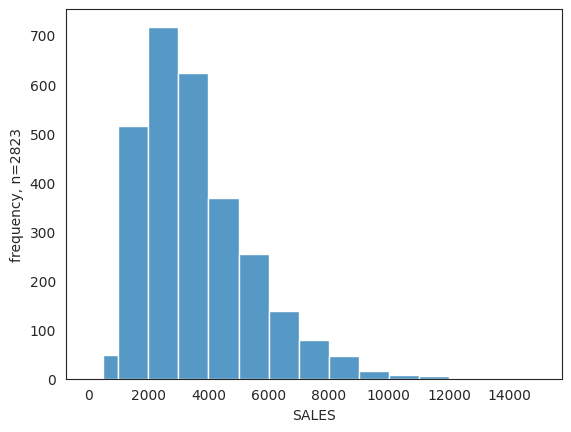

In [ ]:
# Creating Histogram to Plot the distribution of a continuos variable
sns.histplot(df['SALES'], bins=limits)

# modify axis labels
plt.xlabel('SALES')
plt.ylabel(f'frequency, n={n_sales_class}')

* The above histogram is the plot of Sales and their frequency .

* From this we can see that there were more than 700 sales between 2000 and 3000 and very less no of sales were above 10,000.

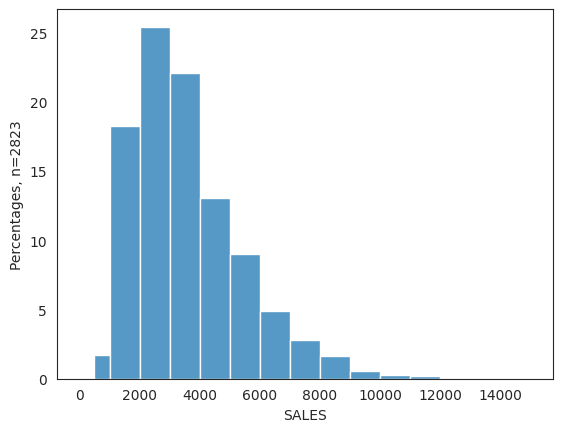

In [ ]:
# histogram for percentages

sns.histplot(df['SALES'], bins=limits, stat='percent')

# modify axis labels
plt.xlabel('SALES')
plt.ylabel(f'Percentages, n={n_sales_class}')

# get rid of text
plt.show()

* The above histogram is the plot of Sales and their frequency in percentages.

* From this we can see that there were more than 25% sales were in between 2000 and 3000 and less than 1% sales were above 10,000

In [ ]:
# Statistical numbers for all the variable
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


* The describe function was used to know descriptive statistics of our data.

* It helps you understand the distribution and basic properties of numerical columns by showing: count, mean, standard deviation, minimum, maximum, lower quartile, meadian and upper quartile.

In [ ]:
# Statistical numbers for specific variables
df6=df[['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'MSRP']].describe()

# remove some of the abbreviations
descriptives = {'25%': 'lower quartile', '75%': 'upper quartile', '50%': 'median' , 'std': 'standard deviation'}
df6= df6.rename(index=descriptives)
df6



,SALES,QUANTITYORDERED,PRICEEACH,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000
mean,3553.889072,35.092809,83.658544,100.715551
standard deviation,1841.865106,9.741443,20.174277,40.187912
min,482.130000,6.000000,26.880000,33.000000
lower quartile,2203.430000,27.000000,68.860000,68.000000
median,3184.800000,35.000000,95.700000,99.000000
upper quartile,4508.000000,43.000000,100.000000,124.000000
max,14082.800000,97.000000,100.000000,214.000000


* Here we are looking over the decriptievs statistics of some specific choosen variables such as SALES, QUANTITY ORDERED, PRICEEACH AND MSRP

* Also, we have renamed some names such as 25% as lower quartile, 75% as upper quartile, 50% as median and std as standard deviation using the rename function.

In [ ]:
#Transpose the table above
df7 = df6.transpose()
df7

,count,mean,standard deviation,min,lower quartile,median,upper quartile,max
SALES,2823.0,3553.889072,1841.865106,482.13,2203.43,3184.8,4508.0,14082.8
QUANTITYORDERED,2823.0,35.092809,9.741443,6.00,27.00,35.0,43.0,97.0
PRICEEACH,2823.0,83.658544,20.174277,26.88,68.86,95.7,100.0,100.0
MSRP,2823.0,100.715551,40.187912,33.00,68.00,99.0,124.0,214.0


* The transpose. function has been used to interchange the rows and columns of the data.

In [ ]:
## style formation for the decimals
decimals = {'count': '{:.0f}' , 'mean': '{:.1f}' , 'standard deviation': '{:.1f}' ,
            'min': '{:.0f}' , 'lower quartile': '{:.2f}' , 'median': '{:.1f}' ,
            'upper quartile': '{:.2f}' , 'max': '{:.0f}'}

df7.style.format(decimals)





,count,mean,standard deviation,min,lower quartile,median,upper quartile,max
SALES,2823,3553.9,1841.9,482,2203.43,3184.8,4508.00,14083
QUANTITYORDERED,2823,35.1,9.7,6,27.00,35.0,43.00,97
PRICEEACH,2823,83.7,20.2,27,68.86,95.7,100.00,100
MSRP,2823,100.7,40.2,33,68.00,99.0,124.00,214


A new style has been created for the decimals using the dictionary and has been applied to our data so that required no of decimals is displayed.

CHARTS

Text(0.5, 0, 'n=n2823')

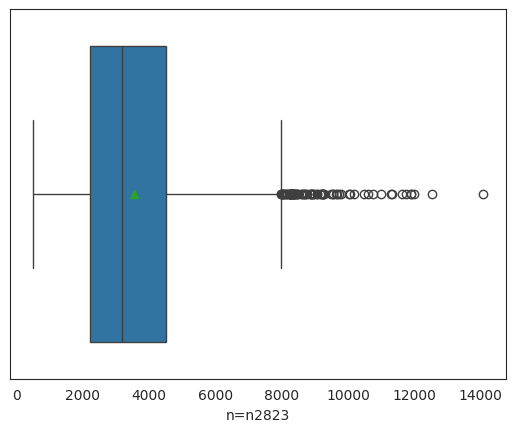

In [ ]:
#Box-plot for SALES
sns.boxplot(x=df['SALES'], showmeans= True)
n_sales=df['SALES'].count()
plt.xlabel(f'n=n{n_sales}')


* Box plot for Sales has been drawn using the sns.boxplot function.

* From the above boxplot we can see that the lower quartile is around 2100, upper quartile at around 4500, median at around 3000, mean at around 3500 , min at around 500 and max at around 8000

* Also, we can see there are many outliers above 8000.

Text(0.5, 0, 'n=2823')

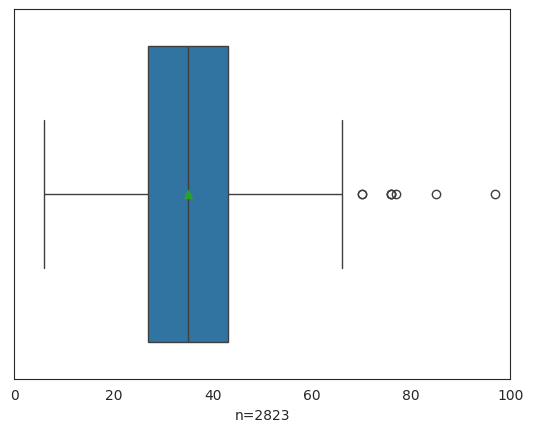

In [ ]:
# Box Plot for Quantity ordered
sns.boxplot(x=df['QUANTITYORDERED'], showmeans=True)
n_quantity=df['QUANTITYORDERED'].count()
plt.xlim([0,100])
plt.xlabel(f'n={n_quantity}')

* Box plot for Quantity Ordered has been drawn above.

* The minimum value is around 7, max is around 67, Q1 at around 25, Q3 at around 45 and mean, median at around 35 and few outliers above max.

Text(0.5, 0, 'n=2823')

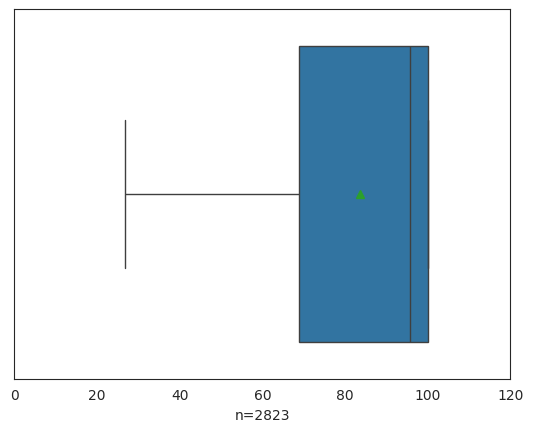

In [ ]:
#Boxplot for price each
sns.boxplot(x=df['PRICEEACH'], showmeans=True)
n_price=df['PRICEEACH'].count()
plt.xlim([0,120])
plt.xlabel(f'n={n_price}')

* Box plot for PriceEach has been drawn above.

* The minimum value is around 27, max is around 100, Q1 at around 70, Q3 at around 100 and mean at around 85 and  median at around 97 and no outliers are here.

Text(0.5, 0, 'n=2823')

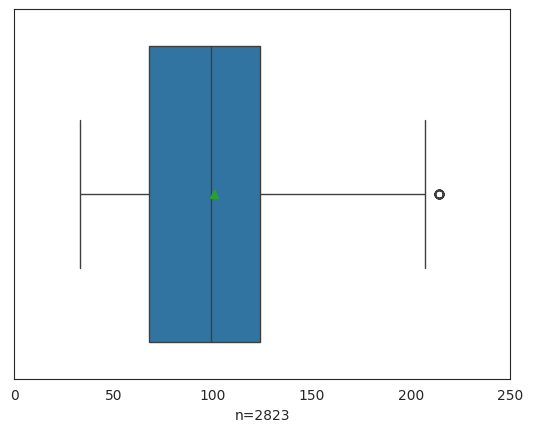

In [ ]:
# Boxplot for MSRP
sns.boxplot(x=df['MSRP'], showmeans=True)
n_msrp=df['MSRP'].count()
plt.xlim([0,250])
plt.xlabel(f'n={n_msrp}')

* Box plot for MSRP has been drawn above.

* The minimum value is around 30, max is around 210, Q1 at around 70, Q3 at around 125 and mean at around 103 and  median at around 100 and one outliers is here at around 220.

<ipython-input-69-7751c26a400c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['PRODUCTLINE'], y=df['SALES'], estimator=sum, ci=None)


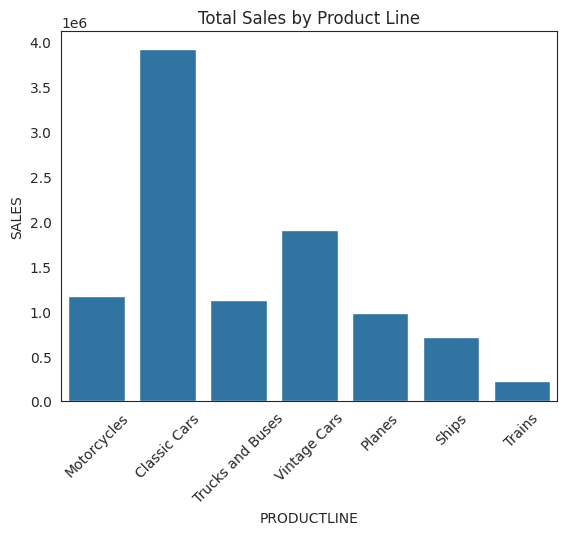

In [ ]:
## Graph to Show Sales by Productline

sns.barplot(x=df['PRODUCTLINE'], y=df['SALES'], estimator=sum, ci=None)
plt.xticks(rotation=45)
plt.title("Total Sales by Product Line")
plt.show()

* Barplot is drawn to show Sales by Productline
* It shows that classic cars are the most sold, followed by vintage cars.
* The sales of motorcycles and trucks and buses looks pretty same.
* The sales of trains are the least.

<ipython-input-70-20c4a5e191e4>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['COUNTRY'], y=df['SALES'], estimator=sum, ci=None)


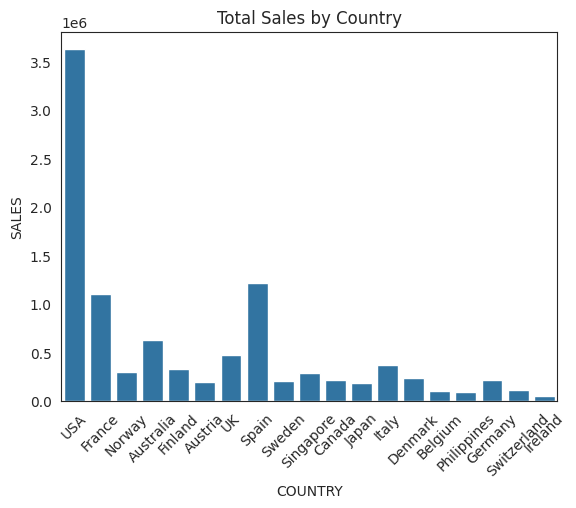

In [ ]:
##Graph to Show Total Sales by Country

sns.barplot(x=df['COUNTRY'], y=df['SALES'], estimator=sum, ci=None)
plt.xticks(rotation=45)
plt.title('Total Sales by Country')
plt.show()

* The barplot shows the Total sales by country.
* We can clearly see that us has made the highest sales, followed by spain on second place and france on the third.
* Also, the sales of Austria and sweden looks pretty same. Similarly sales of denmark and belgium also looks pretty same.
* The least sales is from Ireland.

<ipython-input-71-365b972ca280>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['YEAR_ID'], y=df['SALES'], estimator=sum, ci=None)


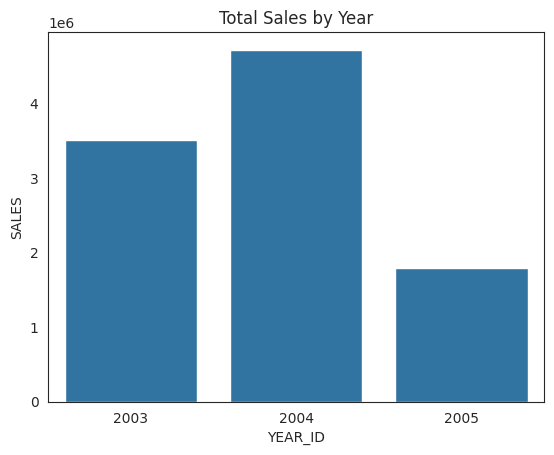

In [ ]:
## Barplot to show sales by Year

sns.barplot(x=df['YEAR_ID'], y=df['SALES'], estimator=sum, ci=None)
plt.title('Total Sales by Year')
plt.show()

* The barplot shows total sales by year.

* We can clearly see from the above barplot that the most sales happened on the year 2004 then the second most sale was on year 2003

* 2005 has the least sales from all the years above.



SOME KEY SUMMARY:

1. The highest sales amount  throughout the data was 14082.8 which took place on year 2005.
2. The lowest sales amount throught all data	was 482.13 which took place on year 2005.
3. Both highest and lowest sales were from year 2005.
4. The highest sales that took place on year 2005 14082.8 was from country US.
5. Classic cars were the most sold product.
6. Trains were the most least sold product.
7. The maximum no of sales were made by US.
8. The least no of sales were made by Ireland.
9. More than 90% of the order were shipped.
10. The maximum of deal size was medium whereas very less of them were large.
11. The was just one sales amount below 500 and one sales amount above 14000
12. The maximum no of sales amount ranges from 2000-3000
13. The minimum quantity ordered were 6 and the maximum ordered were 97.